In [1]:
import numpy as np
import spacepy.plot as spp

import pymc

%matplotlib inline


This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Page 45 example


## Using a uniform Prior


In [3]:
mu = pymc.Uniform('mu', 0, 1e5)
deaths = pymc.Poisson('deaths', mu = 2.0*mu, observed=True, value=[3])
model = pymc.MCMC((mu, deaths))

In [4]:
model.sample(10000, burn=100, burn_till_tuned=True)

 [----------------------------------------------253%----------------------------------------------] 37816 of 14900 complete in 1.5 sec

In [6]:
print(model.summary())


mu:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	2.031            1.002            0.029            [ 0.271  3.931]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.559            1.295           1.904          2.601         4.463
	
None


Plotting mu


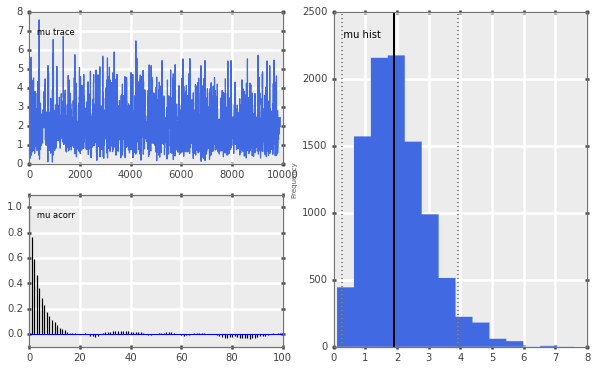

In [7]:
pymc.Matplot.plot(model)

This does not match the example very well. The example is centered around 0.9

## Using a conjugate prior (gamma)

 [-----------------100%-----------------] 14900 of 14900 complete in 0.7 sec
mu:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.854            0.355            0.009            [ 0.271  1.571]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.321            0.598           0.806          1.054         1.697
	
None
Plotting mu


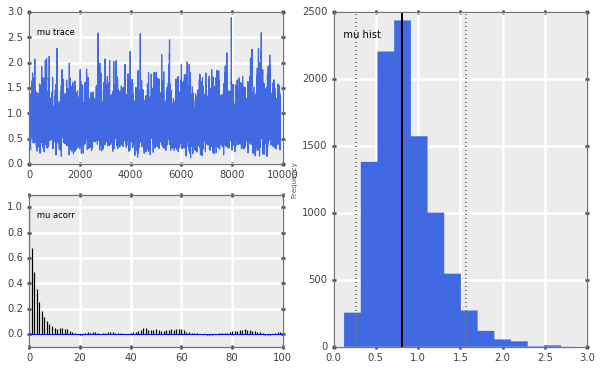

In [8]:
mu = pymc.Gamma('mu', 3.0, 5.0)
deaths = pymc.Poisson('deaths', mu = 2.0*mu, observed=True, value=[3])
model = pymc.MCMC((mu, deaths))
model.sample(10000, burn=100, burn_till_tuned=True)
print(model.summary())
pymc.Matplot.plot(model)

This matches the example quite well, figure 2.5, page 46.